In [1]:
import os
from glob import glob
import torch
import nibabel as nib
import numpy as np

In [2]:
from monai.transforms import (
    Compose,
    LoadImaged, # is becuse we converted labes and images in dictionary form see monai documenation
    ToTensord,
    EnsureChannelFirstd,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,
    LoadImaged, EnsureChannelFirstd, Spacingd,
    ScaleIntensityd, ResizeWithPadOrCropd, EnsureTyped,
)

from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt

In [3]:
data_dir = r'C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train'

In [4]:
train_labels = sorted(glob(os.path.join(data_dir, 'TrainSegmentation','*.nii.gz')))
train_images = sorted(glob(os.path.join(data_dir, 'TrainVolumes','*.nii.gz')))

val_labels = sorted(glob(os.path.join(data_dir, 'TestSegmentation','*.nii.gz')))
val_images = sorted(glob(os.path.join(data_dir, 'TestVolumes','*.nii.gz')))

In [5]:
train_files = [{'image':image_name, 'label': label_name} for image_name , label_name in zip(train_images, train_labels)]
val_files = [{'image':image_name, 'label': label_name} for image_name , label_name in zip(val_images, val_labels)]

In [6]:
"""""
define_transforms = Compose([
    LoadImaged(keys=["image", "label"]),
    EnsureChannelFirstd(keys=["image", "label"]),
    #Orientationd(keys=["image", "label"], axcodes="RAS"),
    Spacingd(keys=["image", "label"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),
    #ScaleIntensityRanged(keys="image"),
    ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(448, 360, 70)),
    EnsureTyped(keys=["image", "label"]),
])
"""


'""\ndefine_transforms = Compose([\n    LoadImaged(keys=["image", "label"]),\n    EnsureChannelFirstd(keys=["image", "label"]),\n    #Orientationd(keys=["image", "label"], axcodes="RAS"),\n    Spacingd(keys=["image", "label"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),\n    #ScaleIntensityRanged(keys="image"),\n    ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(448, 360, 70)),\n    EnsureTyped(keys=["image", "label"]),\n])\n'

In [7]:
"""
# Create datasets and dataloaders
train_ds = Dataset(data=train_files, transform=define_transforms)
val_ds = Dataset(data=val_files, transform=define_transforms)

train_loader = DataLoader(train_ds, batch_size=1, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False)

# Iterate through data (example)
def preprocess_and_save(loader, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    for idx, batch in enumerate(loader):
        image, label = batch["image"], batch["label"]
        
        # Save preprocessed images and labels
        torch.save(image, os.path.join(save_dir, f"image_{idx}.pt"))
        torch.save(label, os.path.join(save_dir, f"label_{idx}.pt"))

# Preprocess and save train and validation data
preprocess_and_save(train_loader, os.path.join(data_dir, "PreprocessedTrain"))
preprocess_and_save(val_loader, os.path.join(data_dir, "PreprocessedVal"))

print("Preprocessing completed!")

"""

'\n# Create datasets and dataloaders\ntrain_ds = Dataset(data=train_files, transform=define_transforms)\nval_ds = Dataset(data=val_files, transform=define_transforms)\n\ntrain_loader = DataLoader(train_ds, batch_size=1, shuffle=True)\nval_loader = DataLoader(val_ds, batch_size=1, shuffle=False)\n\n# Iterate through data (example)\ndef preprocess_and_save(loader, save_dir):\n    os.makedirs(save_dir, exist_ok=True)\n    for idx, batch in enumerate(loader):\n        image, label = batch["image"], batch["label"]\n        \n        # Save preprocessed images and labels\n        torch.save(image, os.path.join(save_dir, f"image_{idx}.pt"))\n        torch.save(label, os.path.join(save_dir, f"label_{idx}.pt"))\n\n# Preprocess and save train and validation data\npreprocess_and_save(train_loader, os.path.join(data_dir, "PreprocessedTrain"))\npreprocess_and_save(val_loader, os.path.join(data_dir, "PreprocessedVal"))\n\nprint("Preprocessing completed!")\n\n'

In [8]:

orig_transforms = Compose(

    [
    LoadImaged(keys=['image','label']),
    EnsureChannelFirstd(keys=['image','label']),

    ToTensord(keys=['image', 'label']),

    ] 
)


train_transforms = Compose(
    [
    LoadImaged(keys=['image','label']),
    EnsureChannelFirstd(keys=['image','label']),
    Spacingd(keys=['image','label'], pixdim = (1.5,1.5,2)),
    #Spacingd(keys=["image", "label"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),
    #below adjusts contrast in an image ,, modify this values accordingly
    #ScaleIntensityRanged(keys='image', a_min=-50, a_max=1250, b_min=0.0, b_max=1.0, clip=True),
    CropForegroundd(keys=['image','label'], source_key='image'),
    #Resized(keys=['image','label'],spatial_size=(448, 360, 80)),
    #ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(448, 360, 72)),
    ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(448, 352, 64)),

    ToTensord(keys=['image', 'label']),

    ] 
)
# loading images
#perform transformations
#convert to tensor


val_transforms = Compose(

    [
    LoadImaged(keys=['image','label']),
    EnsureChannelFirstd(keys=['image','label']),
    #Spacingd(keys=["image", "label"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),
    Spacingd(keys=['image','label'], pixdim = (1.5,1.5,2)),
    #ScaleIntensityRanged(keys='image', a_min=-50, a_max=1250, b_min=0.0, b_max=1.0, clip=True),
    

    ToTensord(keys=['image', 'label']),

    ] 
)


c:\Users\rajwn\Videos\monai_ML_project\Atlas\venv\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


In [9]:

orig_ds = Dataset(data=train_files, transform=orig_transforms)
orig_loader = DataLoader(orig_ds, batch_size=1)

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)

In [10]:
test_patient = first(train_loader)
#print(test_patient['label'])
orig_patient = first(orig_loader)

In [11]:
print(torch.min(test_patient['image']))
print(torch.max(test_patient['image']))

metatensor(0.)
metatensor(2926.0679)


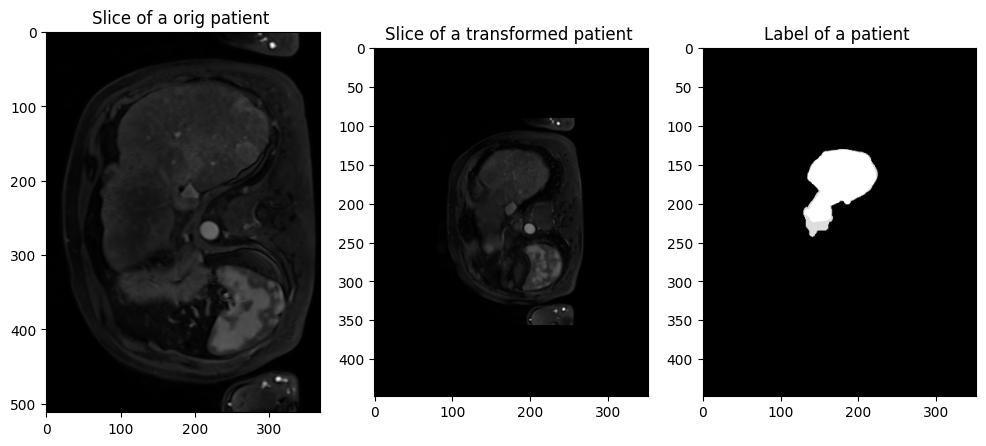

In [12]:
plt.figure('test',(12,6))
plt.subplot(1 , 3, 1)
plt.title('Slice of a orig patient ')
plt.imshow(orig_patient['image'][0, 0, :, :, 50], cmap= 'gray')


plt.figure('test',(12,6))
plt.subplot(1 ,3, 2)
plt.title('Slice of a transformed patient ')
plt.imshow(test_patient['image'][0, 0, :, :, 50], cmap= 'gray')


plt.figure('test',(12,6))
plt.subplot(1 , 3, 3)
plt.title('Label of a patient ')
plt.imshow(test_patient['label'][0, 0, :, :, 50], cmap='gray')

In [13]:
data_dir = r"C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train"
#data_dir = r'C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\atlas-train-dataset-1.0.1\train\TrainVolumes'
model_dir = r'C:\Users\rajwn\Videos\monai_ML_project\Atlas\atlas-train-dataset-1.0.1\results\results_again' 